# Что такое фреймворк

Фреймворк — это набор инструментов и классов, которые помогают разработчикам создавать приложения. Он обычно содержит функции, классы и другие элементы, которые позволяют быстро и эффективно реализовать <u>**конкретный продукт**</u>. Всвою очередь он является куда выше чем пакет и модуль, а также задает правила разработки.

# Что такое PostgreSQL
В кратце это программа для мониторинга и работы с реляционными базами данных. Это программное обеспечение позволяет создавать, удалять и обновлять таблицы, выполнять запросы к данным и многое другое.

Реляционные = табличные


pgAdmin 4 - это программа, а точнее дополнение из пакетов PostgreSQL который добавляет графический интерфейс для работы с базами данных

# Также можно использовать и обычный SQLite

SQLite - пакет, он не имеет графического интерфейса, но позволяет работать с базами данных в командной строке


# Также можно использовать и обычный SQLite

SQLite - пакет, он не имеет графического интерфейса, но позволяет работать с базами данных в командной строке


# Что такое SQLAlchemy

SQLAlchemy, важно понимать, что это не просто фреймворк, а полноценный инструмент для работы с реляционными (табличными) базами данных. Он поддерживает два стиля: core и ORM.

- Core — это низкоуровневый подход, который позволяет выполнять запросы с использованием SQL-выражений, обеспечивая полный контроль над процессом. Этот стиль подходит тем, кто хочет максимально приблизиться к стандартному SQL или имеет особые требования к производительности.

- ORM (Object-Relational Mapping) - это стиль, в котором фреймворк отображает таблицы базы данных на Python-классы. С ORM вы работаете с объектами, а не со строками SQL. Именно на этот стиль мы будем ориентироваться, так как он более удобен, универсален и популярен среди разработчиков.

# Основные компоненты ORM
Работа с SQLAlchemy в стиле ORM включает в себя несколько ключевых понятий:

1. **Модели таблиц** — это Python-классы, представляющие таблицы базы данных. Эти классы содержат информацию о структуре таблиц, таких как колонки, типы данных и связи между таблицами.
2. **Сессии** — объекты, через которые осуществляется взаимодействие с базой данных. Они позволяют выполнять запросы и фиксировать изменения. Сессия открывается в начале работы с базой и закрывается в конце, обеспечивая связь с базой данных на протяжении одного «сеанса».
3. Фабрика сессий — это шаблон для создания сессий. Он используется для управления подключением к базе данных и создания новых сессий по мере необходимости.

# Почему каждый Python-разработчик должен знать SQLAlchemy?

SQLAlchemy упрощает работу с базами данных, превращая их в интуитивно понятные объекты Python. Это делает ваш код более чистым и читаемым, поскольку вы пишете на Python, а не на SQL. Кроме того, он позволяет вам работать с разными базами данных практически без изменения кода — отличная возможность для тех, кто работает в командах, где требуются разные типы БД. SQLAlchemy также предлагает мощные инструменты для управления связями и миграциями, что делает его универсальным выбором для разработки крупных проектов.

# Связи между таблицами
Как упоминалось ранее, SQLAlchemy позволяет устанавливать связи между таблицами через внешние ключи. Рассмотрим основные типы связей:
- "Один к одному" (1:1) — используется, когда каждая запись в одной таблице должна соответствовать только одной записи в другой таблице. Например, профиль пользователя может быть связан с аккаунтом пользователя в соотношении один к одному.

- "Один ко многим" (1:N) — при такой связи одна запись в одной таблице может соответствовать нескольким записям в другой таблице. Например, один пользователь может иметь несколько постов в блоге.

- "Многие к одному" (N:1) — обратная связь "один ко многим". В этом случае несколько записей из одной таблицы могут ссылаться на одну запись в другой таблице, например, несколько комментариев могут быть привязаны к одному посту.

In [ ]:
# ./settings/database.py
from sqlalchemy import create_engine
from sqlalchemy.orm import DeclarativeBase, sessionmaker
from settings.config import settings

DATABASE_URL = settings.get_db_url()

engine = create_engine(DATABASE_URL) # create_async_engine - для async
session_maker = sessionmaker(engine, expire_on_commit=False) # async_sessionmaker

class Base(DeclarativeBase): #, AsyncAttrs):
    __abstract__ = True


- DeclarativeBase: Основной класс для всех моделей, от которого будут наследоваться все таблицы (модели таблиц). Эту особенность класса мы будем использовать неоднократно.

- create_engine: Функция, создающая движок для соединения с базой данных по предоставленному URL.

- sessionmaker: Фабрика сессий для синхронного взаимодействия с базой данных. Сессии используются для выполнения запросов и транзакций.

**Как это работает**

DATABASE_URL: Формируется с помощью метода get_db_url из файла конфигурации config.py. Содержит всю необходимую информацию для подключения к базе данных.

engine:  вижок, необходимый для выполнения операций с базой данных.

session_maker: Фабрика сессий, которая позволяет создавать сессии для взаимодействия с базой данных, управлять транзакциями и выполнять запросы.

Base: Абстрактный базовый класс для всех моделей, от которого будут наследоваться все таблицы. Он не создаст отдельную таблицу в базе данных, но предоставит базовую функциональность для всех других моделей.

**Этот минимальный набор настроек обеспечивает базовую конфигурацию для работы с базой данных в SQLAlchemy. В дальнейшем, мы будем расширять этот файл, добавляя новые методы и настройки для более сложных задач.**

# А вот так выглядит асинхронная реализация

In [ ]:
# /settings/database.py

from sqlalchemy.ext.asyncio import AsyncAttrs, async_sessionmaker, create_async_engine
from settings.config import settings



DATABASE_URL = settings.get_db_url(db_type='async') # тут выбрать свой способ связки с БД

engine = create_async_engine(url = DATABASE_URL)
session_maker = async_sessionmaker(engine, expire_on_commit=False)

class Base(AsyncAttrs, DeclarativeBase):
    __abstract__ = True # Чтобы не создавалась отдельная таблица для этого класса

Расширим базовый класс для модели Base. *На основе синх. реализации*

In [ ]:

from datetime import datetime
from sqlalchemy import create_engine, func
from sqlalchemy.orm import DeclarativeBase, Mapped, declared_attr, mapped_column, sessionmaker
from settings.config import settings

DATABASE_URL = settings.get_db_url()

engine = create_engine(DATABASE_URL) # create_async_engine - для async
session_maker = sessionmaker(engine, expire_on_commit=False) # async_sessionmaker

class Base(DeclarativeBase): #, AsyncAttrs):
    __abstract__ = True
    
    id: Mapped[int] = mapped_column(primary_key=True, autoincrement=True) 
    # id: Mapped[str] = mapped_column(primary_key=True, default=str(uuid.uuid4()))
    create_at: Mapped[datetime] = mapped_column(default=func.now())
    update_at: Mapped[datetime] = mapped_column(default=func.now(), onupdate=func.now())
    
    @declared_attr.directive
    def __tablename__(cls) -> str:
        return cls.__name__.lower() + 's'
    




**Mapped** — это современный способ аннотировать типы данных для колонок в моделях SQLAlchemy. Он позволяет более четко указать, что переменная представляет собой колонку таблицы в базе данных, делая код более читаемым и понятным.

**mapped_column** — это функция, которая используется для создания колонок в моделях SQLAlchemy. Она принимает в качестве аргументов тип данных колонки и дополнительные параметры, такие как primary_key, nullable, default и так далее.

# Максимум гибкости и минимум кода
С Mapped и типовыми аннотациями мы можем значительно упростить описание моделей.

# Модель пользователей
Приступим к описанию моделей. Первой моделью мы опишем модель пользователей.


In [ ]:
# ./models/user.py

from sqlalchemy.orm import Mapped, mapped_column
from settings.database import Base


class User(Base):
    username: Mapped[str] = mapped_column(unique=True) 
    email: Mapped[str] = mapped_column(unique=True)
    password: Mapped[str]
    phone: Mapped[str|None]



# Что то такое ForeignKey простыми словами
Просто говоря, ForeignKey (внешний ключ) – это способ связать одну таблицу с другой в базе данных. Представьте, что у вас есть две таблицы: пользователи и посты. Каждому посту нужен автор, так ведь?

In [ ]:
# ./models/post.py

from sqlalchemy import ForeignKey
from sqlalchemy.orm import Mapped, mapped_column

from settings.database import Base


class Post(Base):
    title: Mapped[str]
    contnet: Mapped[str]
    user_id: Mapped[int] = mapped_column(ForeignKey('users.id'))

Обратите внимание, что мы не задали имя таблицы и не назначили первичный ключ (ID пользователя). Это нам и не требуется, так как класс Base автоматически добавит эти колонки при создании таблицы и назначит ей имя users.

Оптимизация кода с аннотациями
Мы также заметили, что строка Mapped[str] = mapped_column(unique=True) повторяется несколько раз. Чтобы оптимизировать этот процесс, мы можем воспользоваться аннотациями.

Аннотации в SQLAlchemy позволяют вынести описание колонок в отдельные переменные. Это значит, что мы можем описывать колонки один раз, а затем использовать их в моделях. Такой подход упрощает код и делает его более читаемым.

Для использования аннотаций необходимо из модуля typing импортировать объект Annotated. Аннотации я обычно описываю в файле database.py. Вот пример:

In [ ]:
# ./settings/database.py
from typing import Annotated

# ...

uniq_str_an = Annotated[str, mapped_column(unique=True)]

class Base(DeclarativeBase):
    ...

In [ ]:
# Обновленный ./models/user.py


from sqlalchemy.orm import Mapped
from settings.database import Base, uniq_str_an


class User(Base):
    username: Mapped[uniq_str_an]
    email: Mapped[uniq_str_an]
    password: Mapped[str]
    phone: Mapped[str|None]


Описание аннотации
Annotated — это инструмент из модуля typing, который позволяет добавлять метаданные к типам данных. В данном случае мы используем его для описания колонки в SQLAlchemy.

str — это тип данных из Python, который указывает, что колонка будет строкового типа.

mapped_column(unique=True) — эта функция указывает, что колонка будет уникальной, то есть два значения в этой колонке не могут повторяться.

# Enum

Enum из модуля enum в Python используется для создания перечислений, которые представляют собой набор именованных значений. Это позволяет определять типы данных с ограниченным набором возможных значений.

In [ ]:
from enum import Enum


class GenderEnum(str, Enum):
    MALE = 'Мужчина'
    FEMALE = 'Женщина'
    UNDEFINED = 'Не выставлен'

In [ ]:
from typing import List

from sqlalchemy import ARRAY, String, text
from sqlalchemy.dialects.postgresql import JSON
from sqlalchemy.orm import Mapped, mapped_column

from models.enums import GenderEnum
from settings.database import Base


class Profile(Base):
    name: Mapped[str | None]
    surname: Mapped[str | None]
    age: Mapped[int | None]
    gender: Mapped[GenderEnum] = mapped_column(
        default=GenderEnum.UNDEFINED, 
        server_default=text("'UNDEFINED'")
    )
    interests: Mapped[List[str] | None] = mapped_column(ARRAY(String))
    contacts: Mapped[dict|None] = mapped_column(JSON)


: 

## **Параметр default:**
- Этот параметр задает значение по умолчанию на уровне приложения (SQLAlchemy).

- Это означает, что если при создании объекта в коде значение для данного поля не указано, будет использовано значение, указанное в default. Например, при создании объекта класса User, если значение для поля profession не передано, SQLAlchemy автоматически подставит значение по умолчанию, указанное в default.
  
- Пример: Если у нас есть перечисление (ENUM) профессий, то значение по умолчанию может быть выбрано через точку, например: ProfessionEnum.DEVELOPER.

## **Параметр server_default:**

- Этот параметр задает значение по умолчанию на уровне базы данных.

- Это значит, что если при вставке записи в таблицу значение для данного поля не указано, сама база данных подставит значение, указанное в server_default. В отличие от default, это значение применяется, если запись добавляется в таблицу напрямую, например, через SQL-запросы, минуя приложение.

- Важно: Для использования этого параметра с ENUM, нужно передавать значение в виде текстового выражения с помощью метода text, который импортируется из SQLAlchemy. Значение ENUM указывается в кавычках как текст, например: "WRITER", а не само значение, такое как ProfessionEnum.WRITER. Это необходимо для корректного выполнения запроса на стороне базы данных.

# Описание зависимостей (relationship)

## **Один-к-одному (One-to-One)**

У нас есть две модели: User и Profile. Связь между ними организована по принципу один-к-одному (One-to-One). Это значит, что каждый пользователь имеет только один профиль, и каждый профиль принадлежит только одному пользователю.

- Почему используется One-to-One?
Обычно связь "один-к-одному" используется для разделения основной и дополнительной информации. Например, информация о пользователе (имя, email) может находиться в таблице User, а данные профиля (возраст, профессия, интересы) хранятся в отдельной таблице Profile. Это позволяет избежать излишней ширины основной таблицы, что упрощает её обслуживание и управление данными.

- В SQLAlchemy технология relationship позволяет настраивать и управлять связями между таблицами. В случае связи один-к-одному между таблицами User и Profile настройка выглядит следующим образом

Подключение со стороны User:

In [ ]:

from sqlalchemy.orm import Mapped, relationship
from settings.database import Base, uniq_str_an

class User(Base):
    username: Mapped[uniq_str_an]
    email: Mapped[uniq_str_an]
    password: Mapped[str]
    phone: Mapped[str|None]
    
    profile: Mapped['Profile'] = relationship(
        'Profile',
        back_populates='user',
        uselist=False,
        lazy='joined'
    ) 


back_populates="user" — указывает на атрибут обратной связи в модели Profile. Это значит, что при доступе к профилю можно также получить связанного пользователя.

uselist=False — определяет, что связь не является списком (по умолчанию relationship предполагает связь "один-ко-многим" или "многие-к-одному"). Здесь один профиль на одного пользователя, поэтому uselist=False задает связь один-к-одному.

lazy="joined" — задает стратегию подгрузки данных. SQLAlchemy выполнит JOIN запрос и подгрузит профиль сразу при запросе пользователя.

Со стороны Profile:

In [ ]:
from typing import List

from sqlalchemy import ARRAY, String, text
from sqlalchemy.dialects.postgresql import JSON
from sqlalchemy.orm import Mapped, mapped_column, relationship

from models.enums import GenderEnum
from settings.database import Base


class Profile(Base):
    name: Mapped[str | None]
    surname: Mapped[str | None]
    age: Mapped[int | None]
    gender: Mapped[GenderEnum] = mapped_column(
        default=GenderEnum.UNDEFINED, 
        server_default=text("'UNDEFINED'")
    )
    interests: Mapped[List[str] | None] = mapped_column(ARRAY(String))
    contacts: Mapped[dict|None] = mapped_column(JSON)
    
    user = relationship(
        'User',
        back_populates='profile',
        uselist=False
    )


- back_populates="profile" — связывает эту связь с атрибутом profile в модели User, обеспечивая двустороннее управление. Если связать пользователя и профиль, то оба атрибута (user и profile) будут обновляться одновременно.

- uselist=False — так как у каждого профиля может быть только один пользователь, значение False указывает, что это отношение не поддерживает списки, а подразумевает один объект.

## **Связь Один-ко-Многим и Многие-к-Одному**

- В нашей модели User связан с моделью Post по принципу один-ко-многим: один пользователь может создавать много постов, но каждый пост принадлежит только одному пользователю. Эта связь также называется многие-к-одному со стороны Post, так как несколько постов могут ссылаться на одного пользователя.
- Аналогично, модель Post связана с Comment по принципу один-ко-многим: каждый пост может иметь несколько комментариев, но каждый комментарий относится к конкретному посту.

- Почему используется One-to-Many и Many-to-One?
Связь один-ко-многим или многие-к-одному используется, когда один объект (например, пользователь) связан с множеством других объектов (например, постов). Это позволяет логически сгруппировать данные и избежать избыточности. В нашем случае, каждый пользователь может иметь несколько постов, и каждый пост — несколько комментариев.

- Техническая реализация
Связь один-ко-многим и многие-к-одному можно настроить с помощью relationship и ForeignKey.

In [ ]:


from sqlalchemy.orm import Mapped, relationship
from settings.database import Base, uniq_str_an


class User(Base):
    username: Mapped[uniq_str_an]
    email: Mapped[uniq_str_an]
    password: Mapped[str]
    phone: Mapped[str|None]
    
    profile: Mapped['Profile'] = relationship(
        'Profile',
        back_populates='user',
        uselist=False,
        lazy='joined',
        cascade='all, delete-orphan'
    ) 

    posts: Mapped['Post'] = relationship(
        'Post',
        back_populates='user',
        cascade='all, delete-orphan'
    )

In [ ]:
from sqlalchemy import ForeignKey
from sqlalchemy.orm import Mapped, mapped_column, relationship

from settings.database import Base


class Post(Base):
    title: Mapped[str]
    contnet: Mapped[str]
    user_id: Mapped[int] = mapped_column(ForeignKey('users.id'))
    
    user: Mapped['User'] = relationship(
        'User',
        back_populates='posts'
    )
    

- user_id: В Post это внешний ключ, который связывает каждый пост с конкретным пользователем.

- back_populates:

- back_populates="user" в Post указывает на связь с полем posts в User.

- back_populates="posts" в User связывает с полем user в Post. Эти настройки обеспечивают двустороннюю связь.

- cascade="all, delete-orphan": Эта настройка в модели User указывает, что все посты, связанные с пользователем, должны быть удалены, если удаляется сам пользователь.

# **Alembic**

Мы описали модели наших будущих таблиц, но чтобы они превратились в реальные таблицы в базе данных, нужно выполнить процесс миграции. SQLAlchemy предлагает несколько способов для создания и обновления таблиц на основе моделей, и один из самых популярных и мощных инструментов для этой задачи — Alembic.

Alembic позволяет управлять версиями схемы базы данных, отслеживать изменения и легко переносить их на разные среды. Этот инструмент упрощает создание и выполнение миграций, поддерживая базу данных в актуальном состоянии по мере того, как модели меняются.

Для начала работы с Alembic, нам нужно выполнить его инициализацию с поддержкой асинхронного взаимодействия с базой данных. Это можно сделать с помощью следующей команды **в терминале**:

In [ ]:
# Для асинхронной версии
!alembic init -t async migration

# Для синхронной версии
!alembic init migration


После выполнения этой команды в корне проекта появится директория migration и файл alembic.ini. Директория migration будет содержать файлы для управления миграциями, а alembic.ini — файл конфигурации Alembic, который потребуется нам для настройки подключения к базе данных.

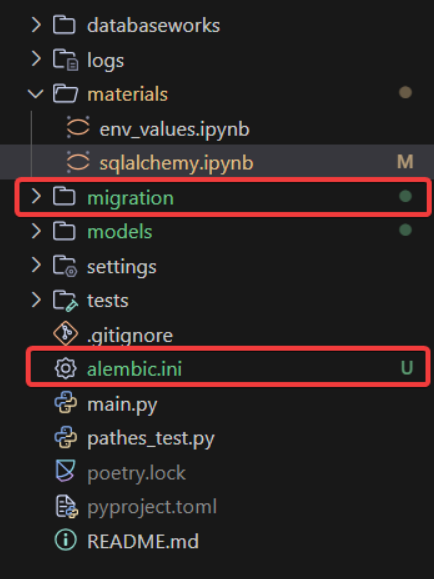

Настройка migration/env.py для работы с базой данных
Для того чтобы Alembic мог корректно взаимодействовать с нашей базой данных, необходимо внести изменения в файл migration/env.py. Этот файл отвечает за конфигурацию миграций, и в нем нужно указать информацию для подключения к базе данных, а также импортировать все модели.

1. Импорт подключения и моделей
В первую очередь, импортируем ссылку для подключения к базе данных и базовый класс Base из файла database.py, а также все наши модели из файла models.py:

In [ ]:
# migration/env.py
from settings.database import Base, DATABASE_URL
from models.user import User

: 

2. Конфигурация подключенияa
Далее указываем Alembic, какой URL использовать для подключения к базе данных:

In [ ]:
# migration/env.py
config = context.config
config.set_main_option("sqlalchemy.url", DATABASE_URL)


Здесь мы используем переменную DATABASE_URL, которая содержит строку подключения к нашей базе данных PostgreSQL.

3. Определение метаданных
Указываем Alembic, где искать информацию о моделях. Для этого присваиваем переменной target_metadata метаданные из Base, которые включают все модели:

In [ ]:
# migration/env.py
target_metadata = Base.metadata

Для создания первой миграции нашей базы данных используется комманда (для обоих версий используется вот такая запись)

```bash
alembic revision --autogenerate -m "*Сообщение о том что мы сделали*"
```

# Важные нюансы работы с Alembic и ENUM типами данных
Когда вы используете Alembic для управления миграциями, нужно учитывать несколько важных особенностей, связанных с типами данных ENUM в PostgreSQL. Давайте разберемся с двумя основными проблемами и способами их решения.

## 1. Проблемы при создании колонки с ENUM
После того как тип данных ENUM создан в PostgreSQL, его имя резервируется и считается уникальным. При работе с Alembic эта особенность не всегда учитывается автоматически, что может привести к ошибкам в будущем.

Пример проблемы
Допустим, у нас есть такая колонка:

```python
sa.Column('gender', sa.Enum('MALE', 'FEMALE', name='genderenum'), nullable=False)
```

Это можно исправить с помощью параметры create_enum = False


```python
sa.Column('gender', sa.Enum('MALE', 'FEMALE', name='genderenum', create_enum=False), nullable=False)
```

## 2. Проблемы при откате миграций (downgrade)
При удалении таблиц с помощью Alembic таблицы удаляются, но связанные с ними ENUM-ы остаются в базе данных. Это может привести к конфликтам, если в будущем вы захотите использовать те же имена для новых ENUM-типов.

In [ ]:
# migration/versions/aa79e1d59e68_creating_database.py
from alembic import op

def downgrade() -> None:
    """Downgrade schema."""
    # ### commands auto generated by Alembic - please adjust! ###
    op.drop_table('posts')
    op.drop_table('users')
    op.drop_table('profiles')
    # ### end Alembic commands ###
    # Дописано нами 
    op.execute("DROP TYPE IF EXISTS genderenum;")

После того как вы внесли правки и убедились, что все готово, можно выполнить откат:

Откат на одну версию назад:

```bash
alembic downgrade -1
```
Откат до определенной миграции:

```bash
alembic downgrade aa79e1d59e68
```

Для обновления данных испольщуется комманда 

Обновление до последней версии
```bash
alembic upgrade head
```


Обновление до конкретной версии
```bash
alembic upgrade <version_id>
```